In [205]:
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from time import gmtime, strftime
from datetime import datetime
from datetime import timedelta

In [206]:
def csv_read(fidPath,idNum):
    df = pd.read_csv(fidPath,header = None, sep = ',')
    # Convert the format of date
    dates = df[0]
    df.index = pd.to_datetime(dates.astype(str), format='%Y%m%d%H%M%S')
    df.index.name = 'Date'
    del df[0] # Remove the "Date" column
    
    
    endNum = len(df.columns)
    #print("endNum:" + str(endNum))
    for ii in range(2,endNum):        
        del df[ii]   
    
    
    # Creat an empty dataframe
    _df = pd.DataFrame({df.columns[0] :[int(idNum)],
                        df.columns[-1]:[np.nan]})
    _df.index.name = 'Date'

    countNum = 0
    startIndexNum = 0
    threshold = timedelta(minutes = 15)
    
    while True:
        try:
            for ii in range(startIndexNum, len(df)):
                dt  = df.index[ii+1]-df.index[ii]        
                if (dt > threshold):
                    # Put the row of NaN values into dataframe
                    _dt = df.index[ii]-df.index[ii-1]
                    _timestamp = df.index[ii] + _dt
                    _df.index = [pd.to_datetime(_timestamp)] # Creat a list for containing a timestamp!!
                    df = df.append(_df)
                    df = df.sort_index()
                    startIndexNum = ii + 1
                    #print("countNum: ", countNum)
                    #print("startIndexNum: ", startIndexNum)
                    countNum += 1
                    break
        except:
                print("ID numeber {} is done!".format(idNum))
                break
    
    return df

In [207]:
#idNum = 5002
#df1 = csv_read("INCM01_5002_20191014125339.csv",idNum)
idNum = 7599
df1 = csv_read("FD02_7599_20191017175710.csv",idNum)

ID numeber 7599 is done!


D:\PythonProgm\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


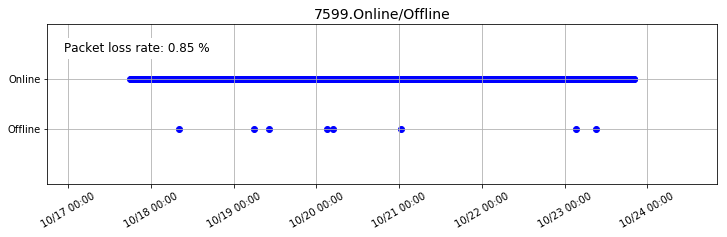

In [208]:
dfPlot = df1[df1.columns[-1]].isna()

fig = plt.figure(num=1, figsize=[12,10])
plt.subplot(3, 1, 1)

for ii in range(0,len(dfPlot)):
    if dfPlot[ii]:
        #print("It is a NAN value.")
        plt.scatter(dfPlot.index[ii],0, c ='b')
    else:
        #print("It is not a NAN value.")
        plt.scatter(dfPlot.index[ii],1, c ='b')
        
ax1 = plt.subplot(311)
ax1.set_title(str(idNum) +'.Online/Offline', fontdict = {'fontsize':14})

plt.ylim(-1.1, 2.1)
#plt.yticks(np.arange(0, 1.1, step = 1))
plt.yticks(np.arange(2), ('Offline', 'Online'))
plt.xticks(rotation = 30)

packetLossRate = df1[df1.columns[-1]].isna().sum()/(df1[df1.columns[0]].count())
packetLossRate = round(packetLossRate,4) * 100

ax1.set_xlim(dfPlot.index[0] - timedelta(days = 1), dfPlot.index[-1] + timedelta(days = 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d %H:%M"))
ax1.text(dfPlot.index[0] - timedelta(days = 0.8),1.55,
         "Packet loss rate: {:.3} %".format(packetLossRate), 
         fontsize = 12, 
         bbox=dict(facecolor="white", alpha = 1, edgecolor = "none" ))

minorLocator = MultipleLocator(0.5)
# ax1.xaxis.set_minor_locator(minorLocator)
ax1.grid()

now = strftime("%Y%m%d%H%M%S")
fig.savefig('packetLoss_ana_' + str(idNum) + '_' + now +'.jpg', dpi= 400)


